<a href="https://colab.research.google.com/github/jazu1412/PYCARET_LOWCODE_ML/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google Colab Random Forest Model Code

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


In [2]:

# Load the cleaned dataset (You can upload the dataset from your local machine)
from google.colab import files
uploaded = files.upload()


Saving Spotify_Most_Streamed_Songs_Cleaned (1).csv to Spotify_Most_Streamed_Songs_Cleaned (1).csv


In [3]:
pwd

'/content'

In [4]:
ls

 sample_data/  'Spotify_Most_Streamed_Songs_Cleaned (1).csv'


In [5]:

# Load the dataset
spotify_data_cleaned = pd.read_csv('Spotify_Most_Streamed_Songs_Cleaned (1).csv')


In [6]:

# Prepare the feature matrix (X) and target variable (y)
X_cleaned = spotify_data_cleaned.drop(columns=['streams', 'track_name', 'artist(s)_name', 'cover_url', 'key', 'mode'])
y_cleaned = spotify_data_cleaned['streams']


In [7]:

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [8]:

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=300,
                      random_state=42)

In [9]:

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred


array([0.15530902, 0.83771229, 0.02885843, 0.37186597, 0.13508807,
       0.56739915, 0.06088598, 0.02764902, 0.12363768, 0.06881122,
       0.21937155, 0.04705863, 0.04505826, 0.18166855, 0.08636061,
       0.1236096 , 0.618288  , 0.05418629, 0.02920482, 0.36130147,
       0.32981052, 0.09257974, 0.0168923 , 0.24178289, 0.0257325 ,
       0.01716612, 0.09342507, 0.09004541, 0.05531537, 0.04654492,
       0.10239473, 0.13915655, 0.21129832, 0.15464299, 0.05321257,
       0.18991582, 0.07697788, 0.028732  , 0.14784206, 0.11141101,
       0.36643486, 0.62694067, 0.11280822, 0.17426337, 0.41288992,
       0.39756832, 0.59905571, 0.0696707 , 0.26170097, 0.31645956,
       0.05005029, 0.03819454, 0.09771684, 0.11152536, 0.41356418,
       0.14445772, 0.88890436, 0.02414704, 0.05950383, 0.40113996,
       0.03159943, 0.49263342, 0.11214952, 0.35654579, 0.07981169,
       0.06125379, 0.3277192 , 0.71964657, 0.03976447, 0.03379497,
       0.07168704, 0.03230353, 0.218207  , 0.3212602 , 0.16395

In [10]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [11]:

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.008750359778665348
Mean Absolute Error (MAE): 0.05998113548876831
R-squared (R²): 0.8604175016464695


In [12]:

# Save the final model to a file
joblib.dump(rf_model, 'final_random_forest_model.pkl')
print("Model saved as final_random_forest_model.pkl")


Model saved as final_random_forest_model.pkl


In [13]:

# Download the model (optional)
files.download('final_random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

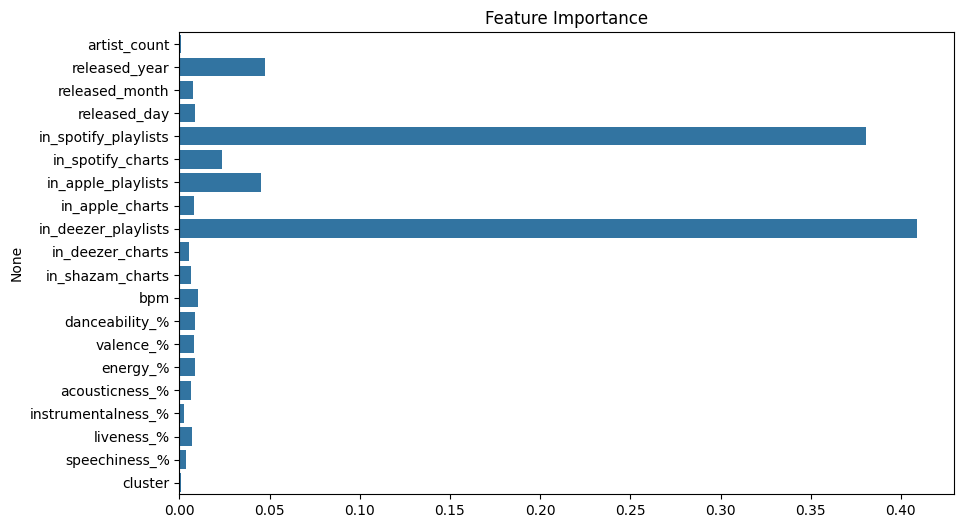

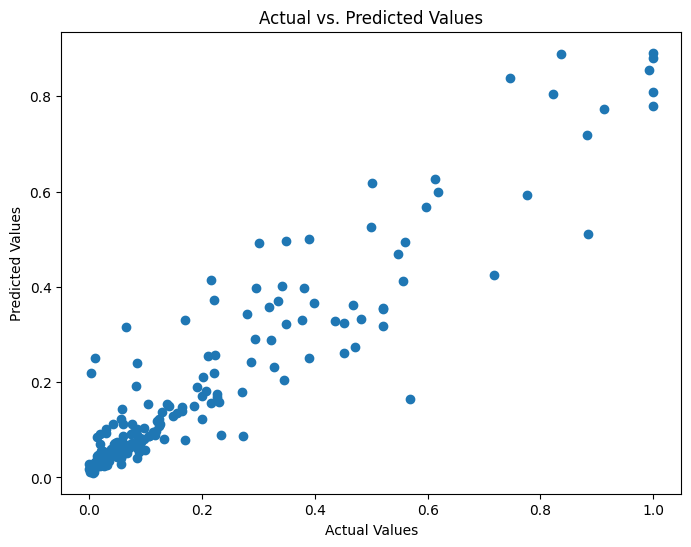

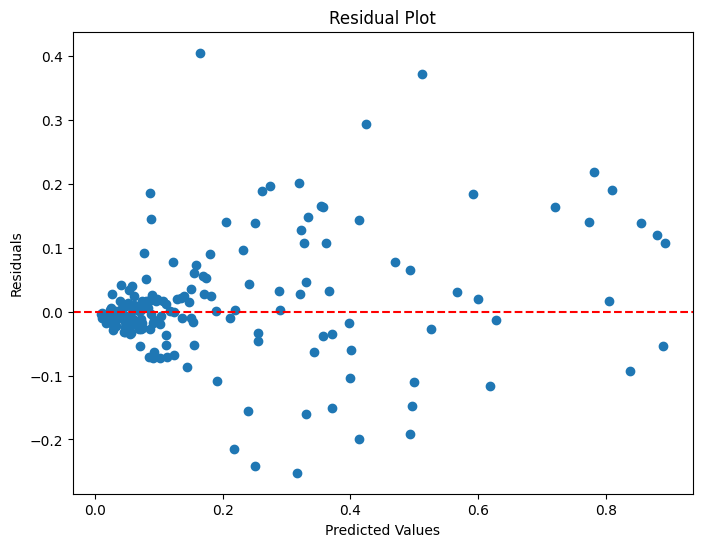

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
feature_importances = rf_model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.show()

# Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()